<a href="https://colab.research.google.com/github/jcmachicao/uc_curso_modelamientopredictivo/blob/master/modpred__04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Cuaderno 04
# **Curso Modelamiento Predictivo**
---
### **Modelos Supervisados**
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression

### Carga de Datos

In [4]:
ruta = 'drive/My Drive/2020 Cursos/2020 Modelamiento Predictivo/'
import os
os.listdir(ruta)

['modpred__04.ipynb',
 'Inteligencia Artificial para Telemedicina.pptx',
 'modpred__01.ipynb',
 'modpred__02.ipynb',
 'uc_modpred_materiales',
 'uc__pnp__ejemplo_100.xlsx',
 'modpred__03.ipynb']

In [5]:
data = pd.read_excel(ruta + 'uc__pnp__ejemplo_100.xlsx')
data.head()

,hora,sexo,edad,canal,tipo
0,0,Masculino,24,teléfono,infracción
1,23,Femenino,59,efectivo,robo
2,9,Femenino,71,personal,violencia
3,24,Masculino,23,formulario web,infracción
4,13,Masculino,40,personal,infracción


### Complemento y Preparación

In [7]:
fac_tipo = pd.factorize(data.tipo)
fac_canal = pd.factorize(data.canal)
fac_sexo = pd.factorize(data.sexo)
data['fac_tipo'] = fac_tipo[0]
data['fac_canal'] = fac_canal[0]
data['fac_sexo'] = fac_sexo[0]
data.head()

,hora,sexo,edad,canal,tipo,fac_tipo,fac_canal,fac_sexo
0,0,Masculino,24,teléfono,infracción,0,0,0
1,23,Femenino,59,efectivo,robo,1,1,1
2,9,Femenino,71,personal,violencia,2,2,1
3,24,Masculino,23,formulario web,infracción,0,3,0
4,13,Masculino,40,personal,infracción,0,2,0


In [8]:
data100 = data.drop(['sexo', 'edad', 'canal', 'tipo'], axis=1)
data100.head()

,hora,fac_tipo,fac_canal,fac_sexo
0,0,0,0,0
1,23,1,1,1
2,9,2,2,1
3,24,0,3,0
4,13,0,2,0


In [9]:
X = data100.drop(['fac_tipo'], axis=1)
X.head()

,hora,fac_canal,fac_sexo
0,0,0,0
1,23,1,1
2,9,2,1
3,24,3,0
4,13,2,0


In [10]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
transf = MinMaxScaler().fit(np.array(X))
X_tr = transf.transform(X)
X_tr.shape

(50, 3)

In [11]:
X_tr[0:5]

array([[0.        , 0.        , 0.        ],
       [0.95833333, 0.33333333, 1.        ],
       [0.375     , 0.66666667, 1.        ],
       [1.        , 1.        , 0.        ],
       [0.54166667, 0.66666667, 0.        ]])

In [12]:
fac_tipo[1]

Index(['infracción', 'robo', 'violencia', 'agresión sexual'], dtype='object')

In [14]:
y_tr = fac_tipo[0]
y_tr

array([0, 1, 2, 0, 0, 1, 2, 3, 0, 3, 2, 1, 1, 0, 1, 1, 0, 2, 3, 0, 2, 2,
       1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 3, 0, 0, 2, 2, 3, 2, 2, 3, 3, 0, 3,
       3, 2, 1, 2, 3, 2])

### Modelo por Regresión Lineal Multivariable

In [15]:
modelo = LinearRegression().fit(X_tr, y_tr)
modelo.coef_

array([-0.12429916, -0.54936135,  0.56337388])

In [17]:
data['predic'] = modelo.predict(X_tr)
data.head()

,hora,sexo,edad,canal,tipo,fac_tipo,fac_canal,fac_sexo,predic
0,0,Masculino,24,teléfono,infracción,0,0,0,1.544021
1,23,Femenino,59,efectivo,robo,1,1,1,1.805154
2,9,Femenino,71,personal,violencia,2,2,1,1.694542
3,24,Masculino,23,formulario web,infracción,0,3,0,0.870360
4,13,Masculino,40,personal,infracción,0,2,0,1.110451


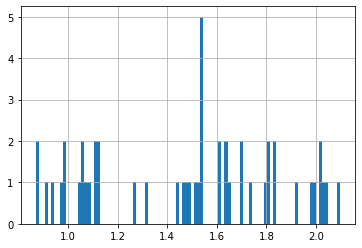

In [20]:
data.predic.hist(bins=100)

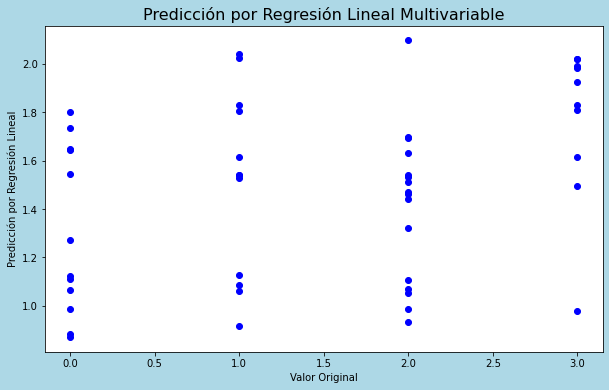

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), facecolor='lightblue')
ax.plot(data.fac_tipo, data.predic, 'ob')
plt.ylabel('Predicción por Regresión Lineal')
plt.xlabel('Valor Original')
plt.title('Predicción por Regresión Lineal Multivariable', fontsize=16)
plt.show()

### Modelo Regresión Logística

In [26]:
modelo = LogisticRegression().fit(X_tr, y_tr)

In [28]:
modelo.predict(X_tr)

array([2, 3, 3, 0, 2, 2, 2, 3, 0, 3, 0, 0, 0, 3, 2, 3, 3, 2, 0, 0, 0, 0,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3,
       3, 2, 3, 3, 2, 2])

In [29]:
data['LG_predic'] = modelo.predict(X_tr)

In [34]:
data['jitter'] = np.random.rand(len(data))

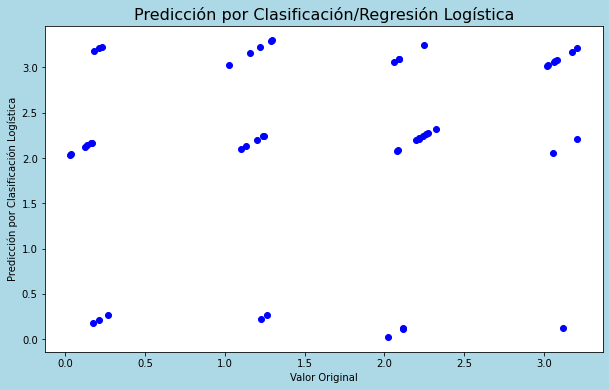

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), facecolor='lightblue')
ax.plot(data.fac_tipo+data.jitter/3, data.LG_predic+data.jitter/3, 'ob')
plt.ylabel('Predicción por Clasificación Logística')
plt.xlabel('Valor Original')
plt.title('Predicción por Clasificación/Regresión Logística', fontsize=16)
plt.show()